In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#1. Series A,B,C 각 Series에서 Status에 따른 단일 투자의 평균 금액 비교

In [3]:
#funding rounds와 organizations 불러오기
df_1_fundingrounds=pd.read_csv('./Dataset/crunchbase_1/funding_rounds.csv')
df_4_organ=pd.read_csv('./Dataset/crunchbase_4/organizations.csv')

#orgs에서 uuid와 status를 추출해 df 생성, uuid를 org_uuid로 변경
#funding rounds org_uuid, investment_type, raised_amount_usd 추출해 df 생성
org_df1=df_4_organ[['uuid','status']].rename(columns={'uuid':'org_uuid'}).dropna(axis=0)
fundround_df1=df_1_fundingrounds[['org_uuid','investment_type','raised_amount_usd']].dropna(axis=0)

#org_df1과 fundround_df1 org_uuid에 대해 병합, investment type(series a,b,c)에 따라 각 df로 분류
seriesmoney=pd.merge(fundround_df1,org_df1, how='left', on='org_uuid').dropna(axis=0)
seriesA=seriesmoney[seriesmoney['investment_type']=='series_a']
seriesB=seriesmoney[seriesmoney['investment_type']=='series_b']
seriesC=seriesmoney[seriesmoney['investment_type']=='series_c']

#Series A,B,C df 그룹화 해 평균낸 raised_amount_usd로 단일투자금액
seriesA=seriesA.groupby(by=['org_uuid','status']).mean().reset_index().sort_values(by='status')
seriesB=seriesB.groupby(by=['org_uuid','status']).mean().reset_index().sort_values(by='status')
seriesC=seriesC.groupby(by=['org_uuid','status']).mean().reset_index().sort_values(by='status')

#각 series별 단일투자금액에 대해 이분산 t-test 검정, Series 별 단일 투자 금액 평균이 유의한 차이를 갖는다는 것 확인
t_stat,p_value = stats.ttest_ind(seriesA['raised_amount_usd'], seriesB['raised_amount_usd'], equal_var=False,alternative='two-sided')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))
t_stat,p_value = stats.ttest_ind(seriesB['raised_amount_usd'], seriesC['raised_amount_usd'], equal_var=False,alternative='two-sided')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))

#Series A, B, C 에 대해 status에 따라 새로운 df로 분류
seriesA_ipo=seriesA[seriesA['status']=='ipo']['raised_amount_usd']
seriesA_acq=seriesA[seriesA['status']=='acquired']['raised_amount_usd']
seriesA_op=seriesA[seriesA['status']=='operating']['raised_amount_usd']
seriesA_cl=seriesA[seriesA['status']=='closed']['raised_amount_usd']

seriesB_ipo=seriesB[seriesB['status']=='ipo']['raised_amount_usd']
seriesB_acq=seriesB[seriesB['status']=='acquired']['raised_amount_usd']
seriesB_op=seriesB[seriesB['status']=='operating']['raised_amount_usd']
seriesB_cl=seriesB[seriesB['status']=='closed']['raised_amount_usd']

seriesC_ipo=seriesC[seriesC['status']=='ipo']['raised_amount_usd']
seriesC_acq=seriesC[seriesC['status']=='acquired']['raised_amount_usd']
seriesC_op=seriesC[seriesC['status']=='operating']['raised_amount_usd']
seriesC_cl=seriesC[seriesC['status']=='closed']['raised_amount_usd']

t-statistics:-19.436985794445384, p-value=7.735932359158978e-84
t-statistics:-10.124781458890244, p-value=5.3761545770172755e-24


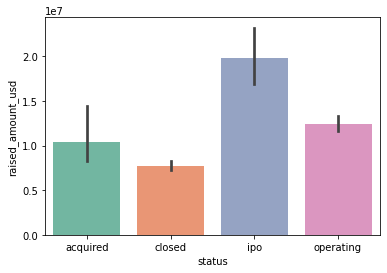

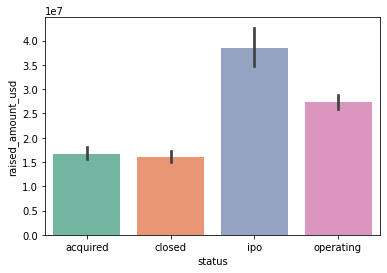

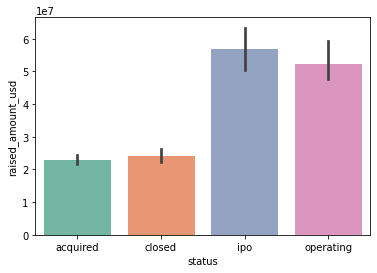

t-statistics:2.722802579222628, p-value=0.003244133349395021
t-statistics:12.971652527589072, p-value=6.58937407993308e-38
t-statistics:14.824967676703716, p-value=2.2141462535823733e-48
t-statistics:1.4211285930868736, p-value=0.07765396165747405
t-statistics:0.7873889891401095, p-value=0.43108031190589746
t-statistics:-1.0367267708984964, p-value=0.8500351046260799


In [4]:
#Series A,B,C에서 Status에 따른 단일투자금액 평균 시각화
sns.set_palette("Set2")

sns.barplot(data = seriesA, x = 'status', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesB, x = 'status', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesC, x = 'status', y = 'raised_amount_usd', estimator = np.mean)
plt.show()


#Series A,B,C에 대해 ipo기업의 단일투자금액과 acquisition 기업의 단일투자금액 이분산 t-test
t_stat,p_value = stats.ttest_ind(seriesA_ipo, seriesA_acq, equal_var=True,alternative='greater')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))
t_stat,p_value = stats.ttest_ind(seriesB_ipo, seriesB_acq, equal_var=True,alternative='two-sided')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))
t_stat,p_value = stats.ttest_ind(seriesC_ipo, seriesC_acq, equal_var=True,alternative='greater')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))

#Series A,B,C에 대해 acquisition 기업의 단일투자금액과 closed 기업의 단일투자금액 이분산 t-test

t_stat,p_value = stats.ttest_ind(seriesA_acq, seriesA_cl, equal_var=True,alternative='greater')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))
t_stat,p_value = stats.ttest_ind(seriesB_acq, seriesB_cl, equal_var=True,alternative='two-sided')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))
t_stat,p_value = stats.ttest_ind(seriesC_acq, seriesC_cl, equal_var=True,alternative='greater')
print('t-statistics:{}, p-value={}'.format(t_stat, p_value))


#2. Series A,B,C 각 Series에서 최종 회사 가치에 따른 단일 투자의 평균 금액 비교

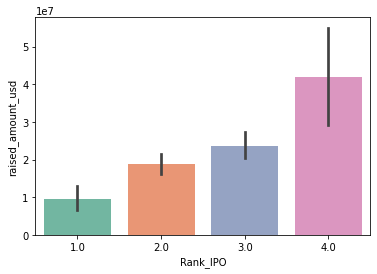

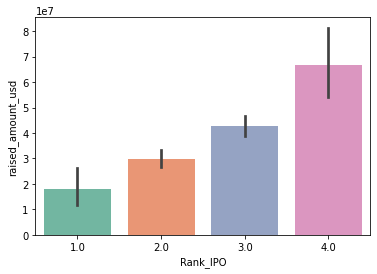

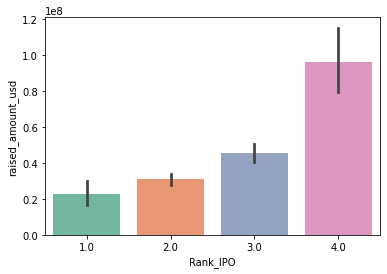

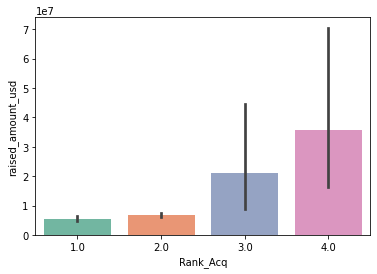

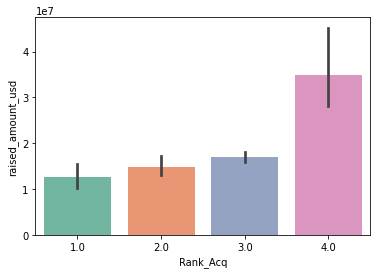

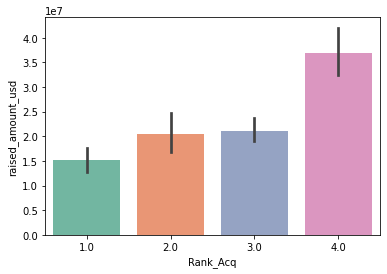

In [6]:
Ranks=pd.read_csv('./Dataset/Ranks.csv')
#Ranks df에서 'org_uuid','Rank_IPO','Rank_Acq' 추출
ranks=Ranks[['org_uuid','Rank_IPO','Rank_Acq']]

#Series A/B/C df와 rank 결합
seriesArank=pd.merge(seriesA,ranks,how='left',on='org_uuid')
seriesBrank=pd.merge(seriesB,ranks,how='left',on='org_uuid')
seriesCrank=pd.merge(seriesC,ranks,how='left',on='org_uuid')

#rank_ipo와 rank acq 가진 기업 분류해 새로운 df 생성, Series A,B,C에 대해 진행
seriesArank_ipo=seriesArank[['org_uuid','raised_amount_usd','status','Rank_IPO']].sort_values('Rank_IPO').dropna(axis=0)
seriesArank_acq=seriesArank[['org_uuid','raised_amount_usd','status','Rank_Acq']].sort_values('Rank_Acq').dropna(axis=0)

seriesBrank_ipo=seriesBrank[['org_uuid','raised_amount_usd','status','Rank_IPO']].sort_values('Rank_IPO').dropna(axis=0)
seriesBrank_acq=seriesBrank[['org_uuid','raised_amount_usd','status','Rank_Acq']].sort_values('Rank_Acq').dropna(axis=0)

seriesCrank_ipo=seriesCrank[['org_uuid','raised_amount_usd','status','Rank_IPO']].sort_values('Rank_IPO').dropna(axis=0)
seriesCrank_acq=seriesCrank[['org_uuid','raised_amount_usd','status','Rank_Acq']].sort_values('Rank_Acq').dropna(axis=0)

#Series A,B,C에 대해 ipo rank에 따른 단일투자금액 평균 시각화
sns.barplot(data = seriesArank_ipo, x = 'Rank_IPO', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesBrank_ipo, x = 'Rank_IPO', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesCrank_ipo, x = 'Rank_IPO', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

#Series A,B,C에 대해 acq rank에 따른 단일투자금액 평균 시각화
sns.barplot(data = seriesArank_acq, x = 'Rank_Acq', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesBrank_acq, x = 'Rank_Acq', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

sns.barplot(data = seriesCrank_acq, x = 'Rank_Acq', y = 'raised_amount_usd', estimator = np.mean)
plt.show()

시각화1) 나라별 & 주별 총 투자금

시각화2) 나라별 & 주별 기업 수

#3. Series A,B,C 각 Series에서 저평가(또는 고평가)된 정도에 따른 단일 투자의 평균 금액 비교

In [13]:
#Data import
Zs_IPO_=pd.read_csv('./Dataset/Zs_IPO.csv')
Zs_Acq_=pd.read_csv('./Dataset/Zs_Acq.csv')

In [9]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

##IPO

정규성, 등분산성 검정

In [15]:
Ranks_list_=["Rank_Seed","Rank_A","Rank_B","Rank_C"]
raised_amount_usds=['raised_amount_usd_Seed','raised_amount_usd_A','raised_amount_usd_B','raised_amount_usd_C']
df_seed=[]

for i in range(len(Ranks_list_)):
  Rank_u=Zs_IPO_.copy()
  Rank_u=Rank_u.drop(Rank_u[Rank_u[Ranks_list_[i]].isnull()].index)
  Rank_u=Rank_u.drop(Rank_u[Rank_u[raised_amount_usds[i]].isnull()].index)
  for j in range(1,4):
    try:
      print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
      print("rank",j,"vs rank",j+1)
      print("등분산성 검정")
      print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==j][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==j+1][raised_amount_usds[i]]))

      print("t-test")
      #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
      print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==j][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==j+1][raised_amount_usds[i]],equal_var=False))
    except:
      pass
  try:
      print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
      print("rank",1,"vs rank",3)
      print("등분산성 검정")
      print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==1][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]]))

      print("t-test")
        #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
      print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==1][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],equal_var=False))
  except:
      pass

  try:
    print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
    print("rank",2,"vs rank",4)
    print("등분산성 검정")
    print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==4][raised_amount_usds[i]]))

    print("t-test")
    #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
    print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==4][raised_amount_usds[i]],equal_var=False))
  except:
    pass    
  try:
    print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
    print("rank","low","vs rank","high")
    print("등분산성 검정")
    print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]<=2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]>=4][raised_amount_usds[i]]))

    print("t-test")
    #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
    print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]<=2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]>=4][raised_amount_usds[i]],equal_var=False))
  except:
    pass      




>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 1 vs rank 2
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 2 vs rank 3
등분산성 검정
BartlettResult(statistic=110.86719625478653, pvalue=6.32703353944724e-26)
t-test
Ttest_indResult(statistic=0.5918733163003107, pvalue=0.613921236166359)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 3 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 1 vs rank 3
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 2 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank low vs rank high
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(s

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:2468: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


BartlettResult(statistic=10.49731634716425, pvalue=0.0011954805064202036)
t-test
Ttest_indResult(statistic=2.5309719328660445, pvalue=0.014142151993910862)


>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<<<<<
rank 1 vs rank 3
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<<<<<
rank 2 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<<<<<
rank low vs rank high
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 1 vs rank 2
등분산성 검정
BartlettResult(statistic=5.4469391689513165, pvalue=0.01960264234803992)
t-test
Ttest_indResult(statistic=1.3477421812886148, pvalue=0.403044466373176)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 2 vs rank 3
등분산성 검정
BartlettResult(statistic=11.867906943674875, pvalue=0.0005710955922218861)
t-test
Ttes

Series A,B,C 각 Series에서 저평가(또는 고평가)된 정도에 따른 단일 투자의 평균 금액 비교

>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
총 데이터 수:  37
1 에 속하는 데이터 수:  0
1 의 seed 평균:  nan
2 에 속하는 데이터 수:  3
2 의 seed 평균:  7661231.0
3 에 속하는 데이터 수:  34
3 의 seed 평균:  11000000.0
4 에 속하는 데이터 수:  0
4 의 seed 평균:  nan


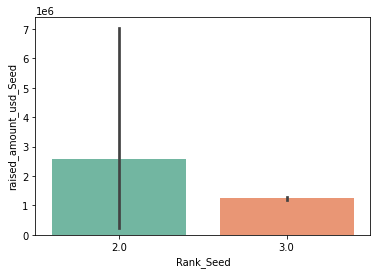

>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<<<<<
총 데이터 수:  61
1 에 속하는 데이터 수:  0
1 의 seed 평균:  nan
2 에 속하는 데이터 수:  1
2 의 seed 평균:  128600000.0
3 에 속하는 데이터 수:  57
3 의 seed 평균:  91689121.87179486
4 에 속하는 데이터 수:  3
4 의 seed 평균:  5112499.0


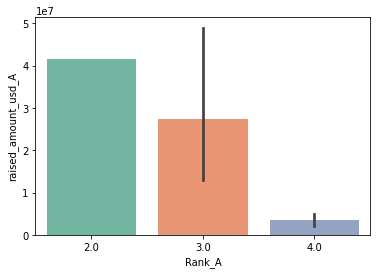

>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
총 데이터 수:  78
1 에 속하는 데이터 수:  2
1 의 seed 평균:  350000000.0
2 에 속하는 데이터 수:  11
2 의 seed 평균:  55616595.2
3 에 속하는 데이터 수:  23
3 의 seed 평균:  204725392.57142857
4 에 속하는 데이터 수:  42
4 의 seed 평균:  279644255.95238096


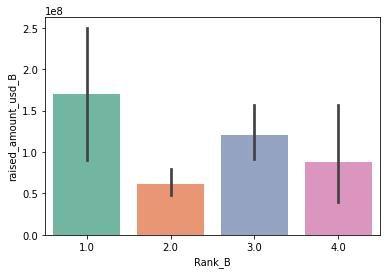

In [16]:
Ranks_list_=["Rank_Seed","Rank_A","Rank_B","Rank_C"]
raised_amount_usds=['raised_amount_usd_Seed','raised_amount_usd_A','raised_amount_usd_B','raised_amount_usd_C']
df_seed=[]

for i in range(len(Ranks_list_)-1):

  print(">>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
  Rank_u=Zs_IPO_.copy()
  Rank_u=Rank_u.drop(Rank_u[Rank_u[Ranks_list_[i]].isnull()].index)
  Rank_u=Rank_u.drop(Rank_u[Rank_u[raised_amount_usds[i]].isnull()].index)
  print("총 데이터 수: ",len(Rank_u))
  for rank_ in range(1,5):
    print(rank_,"에 속하는 데이터 수: ",len(Rank_u[Rank_u[Ranks_list_[i]]==rank_]))
    print(rank_,"의 seed 평균: ",Rank_u[Rank_u[Ranks_list_[i]]==rank_][raised_amount_usds[i+1]].mean())
    

  sns.barplot(data =Rank_u, x =Ranks_list_[i], y = raised_amount_usds[i], estimator = np.mean)
  sns.set_palette("Set2")
  plt.show()

##Acq

정규성, 등분산성 검정

In [17]:
Ranks_list_=["Rank_Seed","Rank_A","Rank_B","Rank_C"]
raised_amount_usds=['raised_amount_usd_Seed','raised_amount_usd_A','raised_amount_usd_B','raised_amount_usd_C']
df_seed=[]

for i in range(len(Ranks_list_)):
  Rank_u=Zs_Acq_.copy()
  Rank_u=Rank_u.drop(Rank_u[Rank_u[Ranks_list_[i]].isnull()].index)
  Rank_u=Rank_u.drop(Rank_u[Rank_u[raised_amount_usds[i]].isnull()].index)
  for j in range(1,4):
    try:
      print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
      print("rank",j,"vs rank",j+1)
      print("등분산성 검정")
      print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==j][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==j+1][raised_amount_usds[i]]))

      print("t-test")
      #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
      print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==j][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==j+1][raised_amount_usds[i]],equal_var=False))
    except:
      pass
  try:
      print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
      print("rank",1,"vs rank",3)
      print("등분산성 검정")
      print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==1][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]]))

      print("t-test")
        #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
      print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==1][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],equal_var=False))
  except:
      pass

  try:
    print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
    print("rank",2,"vs rank",4)
    print("등분산성 검정")
    print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==4][raised_amount_usds[i]]))

    print("t-test")
    #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
    print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==4][raised_amount_usds[i]],equal_var=False))
  except:
    pass    
  try:
    print("\n\n>>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
    print("rank","low","vs rank","high")
    print("등분산성 검정")
    print(bartlett(Rank_u[Rank_u[Ranks_list_[i]]<=2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]>=4][raised_amount_usds[i]]))

    print("t-test")
    #print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]==2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]==3][raised_amount_usds[i]],var_equal=False))
    print(stats.ttest_ind(Rank_u[Rank_u[Ranks_list_[i]]<=2][raised_amount_usds[i]],Rank_u[Rank_u[Ranks_list_[i]]>=4][raised_amount_usds[i]],equal_var=False))
  except:
    pass      




>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 1 vs rank 2
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 2 vs rank 3
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 3 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 1 vs rank 3
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank 2 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
rank low vs rank high
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:2468: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)




>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 1 vs rank 2
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 2 vs rank 3
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 3 vs rank 4
등분산성 검정
BartlettResult(statistic=8.53436412152962, pvalue=0.0034850306276579834)
t-test
Ttest_indResult(statistic=4.1862167564452335, pvalue=0.0020543762770656388)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 1 vs rank 3
등분산성 검정
BartlettResult(statistic=inf, pvalue=0.0)
t-test
Ttest_indResult(statistic=2.870810080356119, pvalue=0.018452316578145403)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank 2 vs rank 4
등분산성 검정
BartlettResult(statistic=nan, pvalue=nan)
t-test
Ttest_indResult(statistic=nan, pvalue=nan)


>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
rank low vs rank high
등분산성 검정
BartlettResult(statistic=4.77758399931447, pvalue=

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


Series A,B,C 각 Series에서 저평가(또는 고평가)된 정도에 따른 단일 투자의 평균 금액 비교

>>>>>>>>>>>> Rank_Seed <<<<<<<<<<<<<<<<<
총 데이터 수:  3
1 에 속하는 데이터 수:  0
1 의 seed 평균:  nan
2 에 속하는 데이터 수:  2
2 의 seed 평균:  1500000.0
3 에 속하는 데이터 수:  1
3 의 seed 평균:  nan
4 에 속하는 데이터 수:  0
4 의 seed 평균:  nan


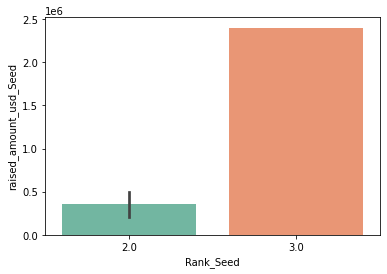

>>>>>>>>>>>> Rank_A <<<<<<<<<<<<<<<<<
총 데이터 수:  3
1 에 속하는 데이터 수:  0
1 의 seed 평균:  nan
2 에 속하는 데이터 수:  3
2 의 seed 평균:  9416666.666666666
3 에 속하는 데이터 수:  0
3 의 seed 평균:  nan
4 에 속하는 데이터 수:  0
4 의 seed 평균:  nan


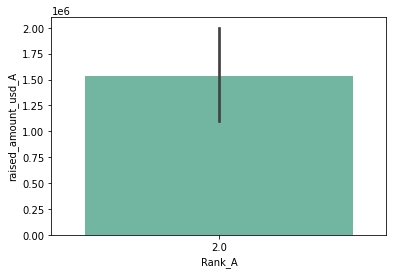

>>>>>>>>>>>> Rank_B <<<<<<<<<<<<<<<<<
총 데이터 수:  19
1 에 속하는 데이터 수:  4
1 의 seed 평균:  180000000.0
2 에 속하는 데이터 수:  1
2 의 seed 평균:  400000000.0
3 에 속하는 데이터 수:  10
3 의 seed 평균:  155144000.0
4 에 속하는 데이터 수:  4
4 의 seed 평균:  8035470.75


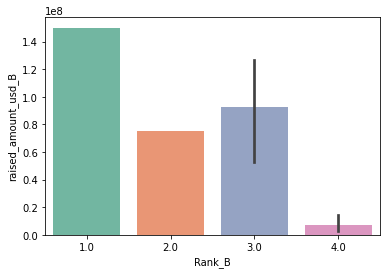

In [18]:
Ranks_list_=["Rank_Seed","Rank_A","Rank_B","Rank_C"]
raised_amount_usds=['raised_amount_usd_Seed','raised_amount_usd_A','raised_amount_usd_B','raised_amount_usd_C']
df_seed=[]

for i in range(len(Ranks_list_)-1):

  print(">>>>>>>>>>>>",Ranks_list_[i],"<<<<<<<<<<<<<<<<<")
  Rank_u=Zs_Acq_.copy()
  Rank_u=Rank_u.drop(Rank_u[Rank_u[Ranks_list_[i]].isnull()].index)
  Rank_u=Rank_u.drop(Rank_u[Rank_u[raised_amount_usds[i]].isnull()].index)
  print("총 데이터 수: ",len(Rank_u))
  for rank_ in range(1,5):
    print(rank_,"에 속하는 데이터 수: ",len(Rank_u[Rank_u[Ranks_list_[i]]==rank_]))
    print(rank_,"의 seed 평균: ",Rank_u[Rank_u[Ranks_list_[i]]==rank_][raised_amount_usds[i+1]].mean())
    

  sns.barplot(data =Rank_u, x =Ranks_list_[i], y = raised_amount_usds[i], estimator = np.mean)
  sns.set_palette("Set2")
  plt.show()